# 기계학습

### 담당교수 : 장원중

In [1]:
# 그래프 한글이 깨질때 & 마이너스 부호 사용

import sys, os
from matplotlib import font_manager, rc 
import matplotlib.pyplot as plt

# 한글 폰트 설정 : 윈도우 폰트를 사용하는 경우 
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name) 

# 운영체제별 한글 폰트 설정
# if os.name == 'posix': # Mac 환경 폰트 설정
#     rc('font', family='AppleGothic')
# elif os.name == 'nt': # Windows 환경 폰트 설정
#     rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

# 유니코드에서 음수 부호설정
rc('axes', unicode_minus=False)

# 부모 디렉터리의 파일을 가져올 수 있도록 설정
sys.path.append(os.pardir)     

# jupyter에서 matplotlib 그래프를 출력 영역에 표시  
%matplotlib inline 

# 레티나 설정 - 폰트 주변이 흐릿하게 보이는 것을 방지해 글씨가 좀 더 선명하게 보임
%config InlineBackend.figure_format = 'retina'

In [2]:
# 운영체제별 이름 

import platform

platform.system()

'Windows'

In [3]:
# 파이썬 버전 확인

import sys
import platform

print("--sys.version—")
print(sys.version)

print("--python_version—")
print(platform.python_version())

--sys.version—
3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]
--python_version—
3.11.7


# 모델 테스트 및 검증

## 홀드아웃(Hold-out) 검증 

In [8]:
# 보스턴 주택 가격 데이터(Boston Housing Price Data) 읽기

import pandas as pd

# UCI 머신러닝 리포지토리에서 데이터셋 불러오기
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
column_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD",
    "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
]
df = pd.read_csv(url, delim_whitespace=True, names=column_names)
print(df.shape)   # (506, 14)
df

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [9]:
from sklearn.model_selection import train_test_split

# 훈련 데이터 70%, 테스트 데이터 30% 분할 
df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)  
df_train.shape, df_test.shape     # ((354, 14), (152, 14))

((354, 14), (152, 14))

In [11]:
# 훈련 데이터 70%, 테스트 데이터 30% 분할  
dfX_train, dfX_test, dfy_train, dfy_test = train_test_split(df.iloc[:, 0:13], df.loc[:,'MEDV'], test_size=0.3, random_state=0)
dfX_train.shape, dfy_train.shape, dfX_test.shape, dfy_test.shape    # ((354, 13), (354,), (152, 13), (152,))

((354, 13), (354,), (152, 13), (152,))

In [39]:
# 회귀 분석 모델로 홀드아웃 검증 

from sklearn.model_selection import KFold
import statsmodels.api as sm
import numpy as np

feature_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD",
    "TAX", "PTRATIO", "B", "LSTAT"
]

# 선형 회귀분석
model = sm.OLS.from_formula("MEDV ~ " + "+".join(feature_names), data=df_train)
result = model.fit()

pred = result.predict(df_test)
rss = ((df_test.MEDV - pred) ** 2).sum()
tss = ((df_test.MEDV - df_test.MEDV.mean())** 2).sum() 
rsquared = 1 - rss / tss

print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))
# 학습 R2 = 0.76454510, 검증 R2 = 0.67338255

학습 R2 = 0.70497483, 검증 R2 = 0.83953317


## K-겹 교차 검증(K-fold cross-validation)

In [ ]:
# KFold 사용하는 경우 : 
# - 주로 회귀 문제(회귀의 결정값은 이산값 형태의 레이블이 아니라 연속된 숫자값이기 때문에 결정값 별로 분포를 정하는 의미가 없기 때문)에 활용 
# - 학습 데이터 세트와 검증 데이터 세트를 점진적으로 변경하면서 마지막 K번째까지 학습과 검증을 수행하는 것이 바로 K폴더 교차 검증

In [45]:
# 교차검증 예제 1 : 선형 회귀 모델로 5-겹 교차검증 
# - 결정 계수를 직접 계산함 

from sklearn.model_selection import KFold
import statsmodels.api as sm
import numpy as np

scores = np.zeros(5)
cv = KFold(5, shuffle=True, random_state=0)

for i, (idx_train, idx_test) in enumerate(cv.split(df)):
    df_train = df.iloc[idx_train]
    df_test = df.iloc[idx_test]
 
    # 선형 회귀분석
    model = sm.OLS.from_formula("MEDV ~ " + "+".join(feature_names), data=df_train)
    result = model.fit()
    
    pred = result.predict(df_test)
    rss = ((df_test.MEDV - pred) ** 2).sum()
    tss = ((df_test.MEDV - df_test.MEDV.mean())** 2).sum() 
    rsquared = 1 - rss / tss
    scores[i] = rsquared
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))
#학습 R2 = 0.77301356, 검증 R2 = 0.58922238
#학습 R2 = 0.72917058, 검증 R2 = 0.77799144
#학습 R2 = 0.74897081, 검증 R2 = 0.66791979
#학습 R2 = 0.75658611, 검증 R2 = 0.66801630
#학습 R2 = 0.70497483, 검증 R2 = 0.83953317  
    
print("검증 R2 평균 = {:.8f}".format(scores.mean())) # 검증 R2 평균 = 0.70853662    

학습 R2 = 0.77301356, 검증 R2 = 0.58922238
학습 R2 = 0.72917058, 검증 R2 = 0.77799144
학습 R2 = 0.74897081, 검증 R2 = 0.66791979
학습 R2 = 0.75658611, 검증 R2 = 0.66801630
학습 R2 = 0.70497483, 검증 R2 = 0.83953317
검증 R2 평균 = 0.70853662


In [46]:
# 교차검증 예제 2 : 선형 회귀 모델로 5-겹 교차검증
# - 결정 계수를 r2_score() 함수로 계산함 

from sklearn.metrics import r2_score

scores = np.zeros(5)
cv = KFold(5, shuffle=True, random_state=0)

for i, (idx_train, idx_test) in enumerate(cv.split(df)):
    df_train = df.iloc[idx_train]
    df_test = df.iloc[idx_test]
    
    model = sm.OLS.from_formula("MEDV ~ " + "+".join(feature_names), data=df_train)
    result = model.fit()
    
    pred = result.predict(df_test)
    rsquared = r2_score(df_test.MEDV, pred)
    scores[i] = rsquared                    # 검증 결과 차례로 저장
    
print(scores)           # [0.58922238 0.77799144 0.66791979 0.6680163  0.83953317]
print("검증 R2 평균 = {:.8f}".format(scores.mean()))  # 검증 R2 평균 = 0.70853662 

[0.58922238 0.77799144 0.66791979 0.6680163  0.83953317]
검증 R2 평균 = 0.70853662


In [43]:
# 교차검증 예제 3 : 선형 회귀 모델로 5-겹 교차검증
# - 결정 계수를 cross_val_score() 함수로 계산함

from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.model_selection import cross_val_score
import statsmodels.formula.api as smf
import statsmodels.api as sm

class StatsmodelsOLS(BaseEstimator, RegressorMixin):
    def __init__(self, formula):
        self.formula = formula
        self.model = None
        self.data = None
        self.result = None
        
    def fit(self, dfX, dfy):
        self.data = pd.concat([dfX, dfy], axis=1)
        self.model = smf.ols(self.formula, data=self.data)
        self.result = self.model.fit()
        
    def predict(self, new_data):
        return self.result.predict(new_data) 
    
# 메인 프로그램
model = StatsmodelsOLS("MEDV ~ " + "+".join(feature_names))
cv = KFold(5, shuffle=True, random_state=0)
scores = cross_val_score(model, df.iloc[:, 0:13], df.loc[:,'MEDV'], scoring="r2", cv=cv)

print(scores)           # [0.58922238 0.77799144 0.66791979 0.6680163  0.83953317]
print("검증 R2 평균 = {:.8f}".format(scores.mean()))  # 검증 R2 평균 = 0.70853662  

[0.58922238 0.77799144 0.66791979 0.6680163  0.83953317]
검증 R2 평균 = 0.70853662


## 계층별(Stratified) KFold 사용

In [ ]:
# StratifedKFold 사용하는 경우 : 
# - 레이블 데이터가 왜곡된 경된 경우 반드시 사용 
# - 즉, 특정 레이블 값이 특이하게 많거나, 매우 적어서 값의 분포가 한쪽으로 치우치는 경우
# - 일반적으로 분류에서의 교차 검증 

# StratifiedKFold : 불균형한 분포도를 가진 레이블 데이터 집합을 위한 KFold 방식이다.

In [47]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

data = load_iris()                                                      # iris 데이터셋 읽어오기 
iris_feature = pd.DataFrame(data=data.data, columns=data.feature_names) # 독립변수 
iris_target = pd.Series(data.target, dtype="category")                  # 종속변수  
iris_target = iris_target.cat.rename_categories(data.target_names)      # cat 속성의 category 
iris = pd.concat([iris_feature, iris_target], axis=1)
print(iris.shape)
iris

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),0
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [51]:
# 열 이름 변경  
iris.rename({"sepal length (cm)":"sepal_length", "sepal width (cm)": "sepal_width", "petal length (cm)":"petal_length", 
             "petal width (cm)":"petal_width", 0:"species"}, axis=1, inplace=True)
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [52]:
#  scikit-learn model_selection 클래스 :
#   - train_test_split 함수를 가져와서 X_train, X_test, y_train_y_test 데이터셋을 분할

# 층을 고려하지 않고 데이터 추출 

X_train, X_test, y_train, y_test = train_test_split(iris.iloc[:, :-1], 
                                                    iris.iloc[:, -1], 
                                                    test_size=0.3,
                                                    shuffle=True,      # shuffle=True : 무작위 추출(random sampling)
                                                    random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(y_train.value_counts())
print(y_test.value_counts())

(105, 4) (45, 4) (105,) (45,)
versicolor    37
virginica     37
setosa        31
Name: species, dtype: int64
setosa        19
versicolor    13
virginica     13
Name: species, dtype: int64


In [53]:
#  scikit-learn model_selection 클래스 :
#   - train_test_split 함수를 가져와서 X_train, X_test, y_train_y_test 데이터셋을 분할

# stratify에는 층 구분 변수이름을 입력, 이때 각 층(stratum, group) 별로 나누어서 test_size 비율을 적용해서 추출 
 
X_train, X_test, y_train, y_test = train_test_split(iris.iloc[:, :-1], 
                                                    iris.iloc[:, -1], 
                                                    test_size=0.3, 
                                                    shuffle=True,             # shuffle=True : 무작위 추출(random sampling)
                                                    stratify=iris['species'], # stratify : 층 구분 변수이름 
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
print(y_train.value_counts())
print(y_test.value_counts())

setosa        35
versicolor    35
virginica     35
Name: species, dtype: int64
setosa        15
versicolor    15
virginica     15
Name: species, dtype: int64


In [54]:
# iris_feature = data.data 
# iris_target = data.target 
# iris_feature, iris_target

In [55]:
# 빈도 출력 함수 : (key: 리스트요소, value: 빈도수)로 이루어진 딕셔너리 생성

import operator
from operator import itemgetter, attrgetter

def count_frequency(x_list):
    count = {}
    for item in x_list:
        count[item] = count.get(item, 0) + 1

    # 내림차순: 빈도수 높은 순으로 정렬
    sorted_count = sorted(count.items(), key = operator.itemgetter(1), reverse = True)         
       
    return sorted_count

<Axes: xlabel='species', ylabel='count'>

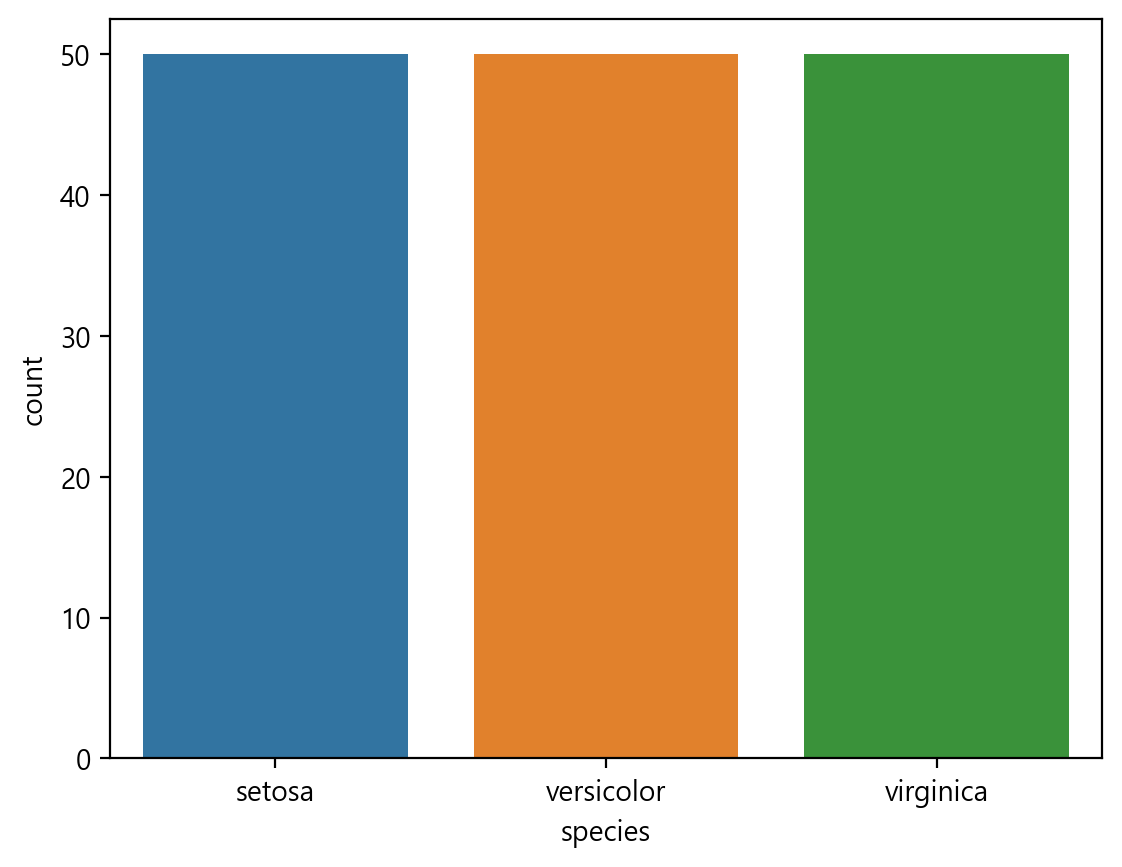

In [56]:
import seaborn as sns 

#  iris dataset 전체의 species 속성 빈도수 
sns.countplot(x='species', data=iris)

In [57]:
count_frequency(iris.species)    # [('setosa', 50), ('versicolor', 50), ('virginica', 50)]

[('setosa', 50), ('versicolor', 50), ('virginica', 50)]

In [58]:
iris.species.value_counts()
#setosa        50
#versicolor    50
#virginica     50
#Name: species, dtype: int64

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [59]:
# 10-겹 KFold를 사용하는 경우 

kfold = KFold(n_splits=10)
n_iter = 0

for train_index, test_index in kfold.split(iris):
    n_iter += 1
    label_train = iris['species'].iloc[train_index]
    label_test = iris['species'].iloc[test_index]
    print('## 교차검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포: \n', count_frequency(label_train))
    print('검증 레이블 데이터 분포: \n', count_frequency(label_test))
    print('----------------------------------------------------')

## 교차검증: 1
학습 레이블 데이터 분포: 
 [('versicolor', 50), ('virginica', 50), ('setosa', 35)]
검증 레이블 데이터 분포: 
 [('setosa', 15)]
----------------------------------------------------
## 교차검증: 2
학습 레이블 데이터 분포: 
 [('versicolor', 50), ('virginica', 50), ('setosa', 35)]
검증 레이블 데이터 분포: 
 [('setosa', 15)]
----------------------------------------------------
## 교차검증: 3
학습 레이블 데이터 분포: 
 [('versicolor', 50), ('virginica', 50), ('setosa', 35)]
검증 레이블 데이터 분포: 
 [('setosa', 15)]
----------------------------------------------------
## 교차검증: 4
학습 레이블 데이터 분포: 
 [('virginica', 50), ('setosa', 45), ('versicolor', 40)]
검증 레이블 데이터 분포: 
 [('versicolor', 10), ('setosa', 5)]
----------------------------------------------------
## 교차검증: 5
학습 레이블 데이터 분포: 
 [('setosa', 50), ('virginica', 50), ('versicolor', 35)]
검증 레이블 데이터 분포: 
 [('versicolor', 15)]
----------------------------------------------------
## 교차검증: 6
학습 레이블 데이터 분포: 
 [('setosa', 50), ('virginica', 50), ('versicolor', 35)]
검증 레이블 데이터 분포: 
 [('versicolor', 15)]


In [60]:
# 10-겹 StratifiedKFold를 사용하는 경우 

from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10)
n_iter = 0

for train_index, test_index in skf.split(iris, iris['species']):
    n_iter += 1
    label_train = iris['species'].iloc[train_index]
    label_test = iris['species'].iloc[test_index]
    print('## 교차검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포: \n', count_frequency(label_train))
    print('검증 레이블 데이터 분포: \n', count_frequency(label_test))
    print('----------------------------------------------------')    

## 교차검증: 1
학습 레이블 데이터 분포: 
 [('setosa', 45), ('versicolor', 45), ('virginica', 45)]
검증 레이블 데이터 분포: 
 [('setosa', 5), ('versicolor', 5), ('virginica', 5)]
----------------------------------------------------
## 교차검증: 2
학습 레이블 데이터 분포: 
 [('setosa', 45), ('versicolor', 45), ('virginica', 45)]
검증 레이블 데이터 분포: 
 [('setosa', 5), ('versicolor', 5), ('virginica', 5)]
----------------------------------------------------
## 교차검증: 3
학습 레이블 데이터 분포: 
 [('setosa', 45), ('versicolor', 45), ('virginica', 45)]
검증 레이블 데이터 분포: 
 [('setosa', 5), ('versicolor', 5), ('virginica', 5)]
----------------------------------------------------
## 교차검증: 4
학습 레이블 데이터 분포: 
 [('setosa', 45), ('versicolor', 45), ('virginica', 45)]
검증 레이블 데이터 분포: 
 [('setosa', 5), ('versicolor', 5), ('virginica', 5)]
----------------------------------------------------
## 교차검증: 5
학습 레이블 데이터 분포: 
 [('setosa', 45), ('versicolor', 45), ('virginica', 45)]
검증 레이블 데이터 분포: 
 [('setosa', 5), ('versicolor', 5), ('virginica', 5)]
------------------

In [30]:
# 의사결정트리 모델 

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=1234)

In [31]:
# iris.iloc[:,0:4]
# iris['sepal_length','sepal_width','petal_length','petal_width'].iloc[10]
iris.iloc[:,:-1]
# iris.iloc[10,11]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [32]:
# KFold 사용

from sklearn.metrics import accuracy_score

cv = KFold(n_splits=10)  # K=10 
cv_accuracy=[]           # KFold 별 정확도 저장 
n_iter = 0               # 반복횟수 

# KFold 객체의 split()를 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 변환
for train_index, test_index in cv.split(iris):
    print(train_index.shape, test_index.shape)
    
    # kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train = iris_feature.iloc[train_index] 
    X_test = iris_feature.iloc[test_index]

    y_train = iris['species'].iloc[train_index]
    y_test = iris['species'].iloc[test_index]
    
    # 학습 및 예측
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    n_iter += 1          # 반복횟수 

    label_train = iris['species'].iloc[train_index]
    label_test = iris['species'].iloc[test_index]
    
    print("n_iter=",n_iter,"\n",count_frequency(label_train), count_frequency(label_test))
    
    # 반복 시마다 정확도 측정
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    
    print('교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
    print('검증 세트 인덱스 :{1}'.format(n_iter, test_index))
    print('------------------------------------------------------------')
    cv_accuracy.append(accuracy)
    
# 개별 iteration별 정확도를 합하여 평균 정확도 계산
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))  # 평균 검증 정확도: 0.95333

(135,) (15,)
n_iter= 1 
 [('versicolor', 50), ('virginica', 50), ('setosa', 35)] [('setosa', 15)]
교차 검증 정확도 :1.0, 학습 데이터 크기: 135, 검증 데이터 크기: 15
검증 세트 인덱스 :[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
------------------------------------------------------------
(135,) (15,)
n_iter= 2 
 [('versicolor', 50), ('virginica', 50), ('setosa', 35)] [('setosa', 15)]
교차 검증 정확도 :1.0, 학습 데이터 크기: 135, 검증 데이터 크기: 15
검증 세트 인덱스 :[15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
------------------------------------------------------------
(135,) (15,)
n_iter= 3 
 [('versicolor', 50), ('virginica', 50), ('setosa', 35)] [('setosa', 15)]
교차 검증 정확도 :1.0, 학습 데이터 크기: 135, 검증 데이터 크기: 15
검증 세트 인덱스 :[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]
------------------------------------------------------------
(135,) (15,)
n_iter= 4 
 [('virginica', 50), ('setosa', 45), ('versicolor', 40)] [('versicolor', 10), ('setosa', 5)]
교차 검증 정확도 :0.9333, 학습 데이터 크기: 135, 검증 데이터 크기: 15
검증 세트 인덱스 :[45 46 47 48 49 50 51 52 53 54 55 

In [33]:
# StratifiedKFold 사용

from sklearn.metrics import accuracy_score

skf = StratifiedKFold(n_splits=10)
cv_accuracy=[]           # KFold 별 정확도 저장 
n_iter = 0               # 반복횟수 

# KFold 객체의 split()를 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 변환
for train_index, test_index in skf.split(iris.iloc[:,:-1],iris['species']):
    print(train_index.shape, test_index.shape)
    
    # kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train = iris_feature.iloc[train_index] 
    X_test = iris_feature.iloc[test_index]

    y_train = iris['species'].iloc[train_index]
    y_test = iris['species'].iloc[test_index]
    
    # 학습 및 예측
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    n_iter += 1          # 반복횟수 

    label_train = iris['species'].iloc[train_index]
    label_test = iris['species'].iloc[test_index]
    
    print("n_iter=",n_iter,"\n",count_frequency(label_train), count_frequency(label_test))
    
    # 반복 시마다 정확도 측정
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    
    print('교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
    print('검증 세트 인덱스 :{1}'.format(n_iter, test_index))
    print('------------------------------------------------------------')
    cv_accuracy.append(accuracy)
    
# 개별 iteration별 정확도를 합하여 평균 정확도 계산
print('검증 정확도 \n', cv_accuracy)
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))  # 평균 검증 정확도: 0.95999

(135,) (15,)
n_iter= 1 
 [('setosa', 45), ('versicolor', 45), ('virginica', 45)] [('setosa', 5), ('versicolor', 5), ('virginica', 5)]
교차 검증 정확도 :1.0, 학습 데이터 크기: 135, 검증 데이터 크기: 15
검증 세트 인덱스 :[  0   1   2   3   4  50  51  52  53  54 100 101 102 103 104]
------------------------------------------------------------
(135,) (15,)
n_iter= 2 
 [('setosa', 45), ('versicolor', 45), ('virginica', 45)] [('setosa', 5), ('versicolor', 5), ('virginica', 5)]
교차 검증 정확도 :0.9333, 학습 데이터 크기: 135, 검증 데이터 크기: 15
검증 세트 인덱스 :[  5   6   7   8   9  55  56  57  58  59 105 106 107 108 109]
------------------------------------------------------------
(135,) (15,)
n_iter= 3 
 [('setosa', 45), ('versicolor', 45), ('virginica', 45)] [('setosa', 5), ('versicolor', 5), ('virginica', 5)]
교차 검증 정확도 :1.0, 학습 데이터 크기: 135, 검증 데이터 크기: 15
검증 세트 인덱스 :[ 10  11  12  13  14  60  61  62  63  64 110 111 112 113 114]
------------------------------------------------------------
(135,) (15,)
n_iter= 4 
 [('setosa', 45), ('versicolor'

## 교차 검증을 보다 간편하게 - cross_val_score()

In [34]:
# cross_val_score() 함수는 기존에 폴드 세트를 지정하고, for 루프에서 반복으로 학습 및 테스트 데이터의 인덱스를 추출하고, 
#                          반복적으로 학습과 예측을 수행하는 일련의 과정을 한번에 수행해주는 API이다.

# 특히 분류기(classifier) 학습을 진행하는 경우 : 
#  - 자동으로 계층별(stratified) KFold 방식을 진행해주기 때문에 더할나위 없이 편하다고 할 수 있다.

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

results = cross_val_score(model,iris.iloc[:,:-1],iris['species'],cv=10)
fin_result = np.mean(results)

for i, _ in enumerate(results):
    print("{}번째 교차검증 정확도: {}".format(i, _))

#0번째 교차검증 정확도: 1.0
#1번째 교차검증 정확도: 0.9333333333333333
#2번째 교차검증 정확도: 1.0
#3번째 교차검증 정확도: 0.9333333333333333
#4번째 교차검증 정확도: 0.9333333333333333
#5번째 교차검증 정확도: 0.8666666666666667
#6번째 교차검증 정확도: 0.9333333333333333
#7번째 교차검증 정확도: 1.0
#8번째 교차검증 정확도: 1.0
#9번째 교차검증 정확도: 1.0
    
print("교차검증 최종 정확도: {}".format(fin_result))  # 교차검증 최종 정확도: 0.96 

# 앞의 예제인 StratifiedKFold의 교차 검증별 정확도와 평균 검증 정확도가 모두 동일함을 알 수있는데 이유가 뭘까요?
# 바로 cross_val_score()은 내부적으로 StratifiedKFold를 이용하기 때문이다.

0번째 교차검증 정확도: 1.0
1번째 교차검증 정확도: 0.9333333333333333
2번째 교차검증 정확도: 1.0
3번째 교차검증 정확도: 0.9333333333333333
4번째 교차검증 정확도: 0.9333333333333333
5번째 교차검증 정확도: 0.8666666666666667
6번째 교차검증 정확도: 0.9333333333333333
7번째 교차검증 정확도: 1.0
8번째 교차검증 정확도: 1.0
9번째 교차검증 정확도: 1.0
교차검증 최종 정확도: 0.96


## StratifiedShuffleSplit (계층적 샘플링) 클래스 : 층화 무작위 추출을 통한 train set, test set 분할 

In [ ]:
# StratifiedShuffleSplit() 클래스 : 
# 모집단을 여러개의 층으로 구분하여, 각 층에서 n개씩 랜덤하게 추출하는 방법 
#  - 순수한 무작위 샘플링 방식은 데이터의 크기가 충분히 크지 않은 상황 등 샘플링 편향이 발생할 수 있는 가능성이 생길수 있다. 
#  - 전체 데이터를 계층별 그룹으로 나눈뒤. 테스트 세트가 전체 데이터의 각 계층의 계수 비율 만큼 샘플링 한다.

# 사이킷 런 계층적 샘플링 - sklearn.model_selection.StratifiedShuffleSplit
#  - StratifiedShuffleSplit(n_splits=10, *, test_size=None, train_size=None, random_state=None) 
#                           n_splits : 분리할 데이터 셋의 개수를 지정 
#                           test_size : 테스트 셋의 비율을 지정 
#                           train_size : 훈련 셋의 비율을 지정 
#                           random_state : 생성된 훈련 및 데스트 셋 난수를 지정 

# StratfiedShuffleSplit() 함수 :
#  - 각 층의 비율을 고려해 무작위로 train/test set을 분할할 수 있는 indices를 반환한다.  

In [35]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

sfld = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
cv_accuracy=[]           # CV별 정확도 저장 
n_iter = 0               # 반복횟수 

for train_index, test_index in sfld.split(iris.iloc[:,:-1],iris['species']):  # indices를 반환
    print(train_index.shape, test_index.shape)
    
    # kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train = iris_feature.iloc[train_index] 
    X_test = iris_feature.iloc[test_index]

    y_train = iris['species'].iloc[train_index]
    y_test = iris['species'].iloc[test_index]

    n_iter += 1          # 반복횟수 
        
    label_train = iris['species'].iloc[train_index]
    label_test = iris['species'].iloc[test_index]
    print("n_iter=",n_iter,"\n",count_frequency(label_train), count_frequency(label_test))  
    print('------------------------------------------------------------------------------')

(105,) (45,)
n_iter= 1 
 [('virginica', 35), ('setosa', 35), ('versicolor', 35)] [('virginica', 15), ('setosa', 15), ('versicolor', 15)]
------------------------------------------------------------------------------
(105,) (45,)
n_iter= 2 
 [('virginica', 35), ('setosa', 35), ('versicolor', 35)] [('versicolor', 15), ('setosa', 15), ('virginica', 15)]
------------------------------------------------------------------------------
(105,) (45,)
n_iter= 3 
 [('virginica', 35), ('setosa', 35), ('versicolor', 35)] [('virginica', 15), ('setosa', 15), ('versicolor', 15)]
------------------------------------------------------------------------------
(105,) (45,)
n_iter= 4 
 [('versicolor', 35), ('virginica', 35), ('setosa', 35)] [('virginica', 15), ('versicolor', 15), ('setosa', 15)]
------------------------------------------------------------------------------
(105,) (45,)
n_iter= 5 
 [('setosa', 35), ('versicolor', 35), ('virginica', 35)] [('virginica', 15), ('setosa', 15), ('versicolor', 15)]

In [36]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

sfld = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=0)
cv_accuracy=[]           # CV별 정확도 저장 
n_iter = 0               # 반복횟수 

for train_index, test_index in sfld.split(iris.iloc[:,:-1],iris['species']):   # indices를 반환
    print(train_index.shape, test_index.shape)
    
    # kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train = iris_feature.iloc[train_index] 
    X_test = iris_feature.iloc[test_index]

    y_train = iris['species'].iloc[train_index]
    y_test = iris['species'].iloc[test_index]

    n_iter += 1          # 반복횟수 
        
    label_train = iris['species'].iloc[train_index]
    label_test = iris['species'].iloc[test_index]
    print("n_iter=",n_iter,"\n",count_frequency(label_train), count_frequency(label_test))  
    print('------------------------------------------------------------------------------')

(105,) (45,)
n_iter= 1 
 [('virginica', 35), ('setosa', 35), ('versicolor', 35)] [('virginica', 15), ('setosa', 15), ('versicolor', 15)]
------------------------------------------------------------------------------


## sklearn.model_selection.train_test_split() : 층화 무작위 추출을 통한 train set, test set 분할 

In [37]:
# sklearn.model_selection.train_test_split 함수를 이용한 Train, Test set 분할 
#   - 층을 고려한 X_train, X_test, y_train, y_test 반환 

#  scikit-learn model_selection 모듈은 train_test_split 함수로 X_train, X_test, y_train, y_test 데이터셋을 분할

# train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None,)
#  - stratify : 층 구분 변수이름을 입력, 이때 각 층(stratum, group) 별로 나누어서 test_size 비율을 적용해서 추출 
#  - test_size : test set의 비율 
#  - shuffle=True : 무작위 추출(random sampling) / shuffle=False : 체계적 추출(systematic sampling) 
#  - random_state : 재현가능성을 위해서 난수 초기값으로 아무 숫자나 지정

X_train, X_test, y_train, y_test = train_test_split(iris.iloc[:, :-1], 
                                                    iris.iloc[:, -1], 
                                                    test_size=0.3, 
                                                    shuffle=True,             # shuffle=True : 무작위 추출(random sampling)
                                                    stratify=iris['species'], # stratify : 층 구분 변수이름 
                                                    random_state=42)          # 데이터셋 분할결과를 반환 
X_train.shape, X_test.shape, y_train.shape, y_test.shape
print(y_train.value_counts())
#setosa        35
#versicolor    35
#virginica     35
#Name: species, dtype: int64       
print(y_test.value_counts())
#setosa        15
#versicolor    15
#virginica     15
#Name: species, dtype: int64

setosa        35
versicolor    35
virginica     35
Name: species, dtype: int64
setosa        15
versicolor    15
virginica     15
Name: species, dtype: int64
